In [3]:
import torch
from skimage import io
from skimage import io
import matplotlib.pyplot as plt
import cv2

from tqdm import tqdm

%matplotlib inline

In [4]:
from google.colab.patches import cv2_imshow # for image display


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
if torch.cuda.is_available(): 
   device = 'cuda' 
else: 
   device = 'cpu' 

device

'cuda'

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # or yolov5m, yolov5l, yolov5x, custom

In [ ]:
Path      = "archive/"
Path      = "/content/drive/MyDrive/152_478_AI_2564_2/video_data/"    
filename  = "WADADA .mp4"


print(Path+filename)

/content/drive/MyDrive/152_478_AI_2564_2/video_data/WADADA .mp4


In [ ]:
# capture the video
cap = cv2.VideoCapture(Path+filename)

# check if capture was successful
if not cap.isOpened(): 
    print("Could not open!")
else:
    print("Video read successful!")
    
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width        = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height       = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps          = cap.get(cv2.CAP_PROP_FPS)
    
    print('Total frames: ' + str(total_frames))
    print('width: ' + str(width))
    print('height: ' + str(height))
    print('fps: ' + str(fps))

Video read successful!
Total frames: 7672
width: 854
height: 480
fps: 29.97


  0%|          | 0/700 [00:00<?, ?it/s]

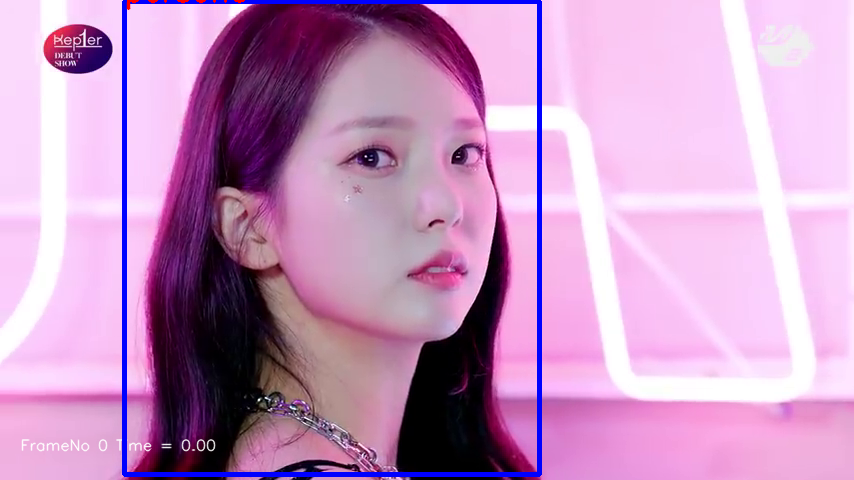

 14%|█▍        | 100/700 [00:28<02:30,  3.98it/s]

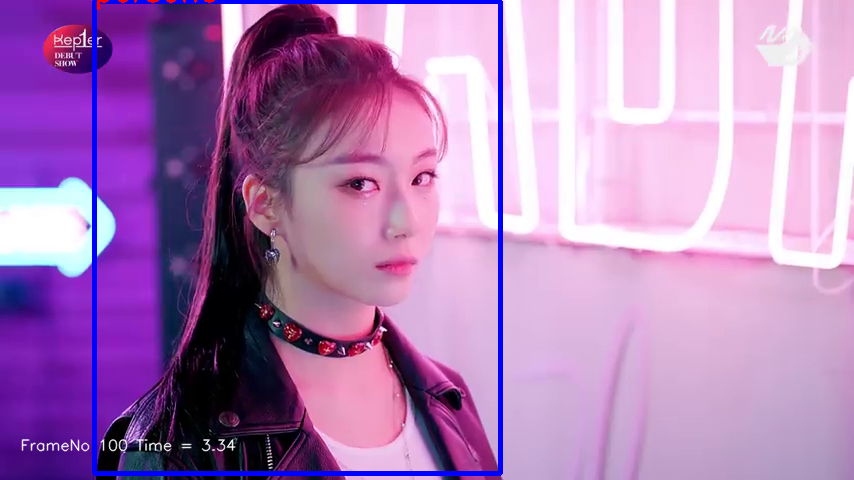

 29%|██▊       | 200/700 [01:01<03:19,  2.51it/s]

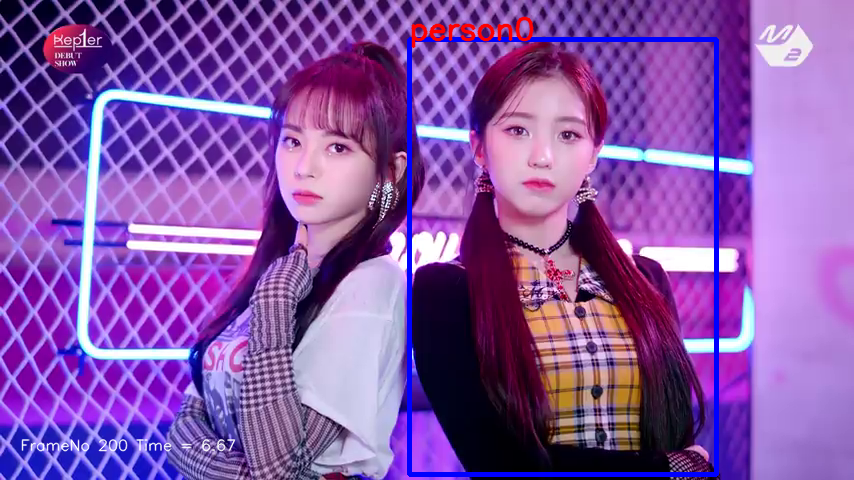

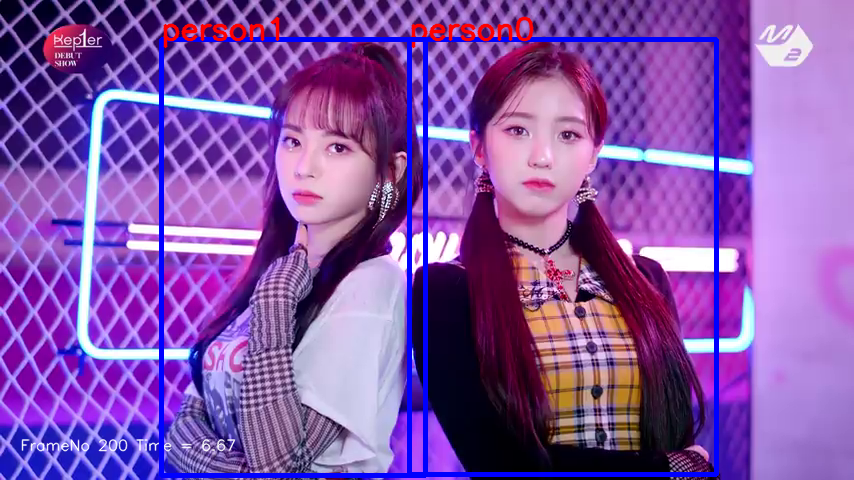

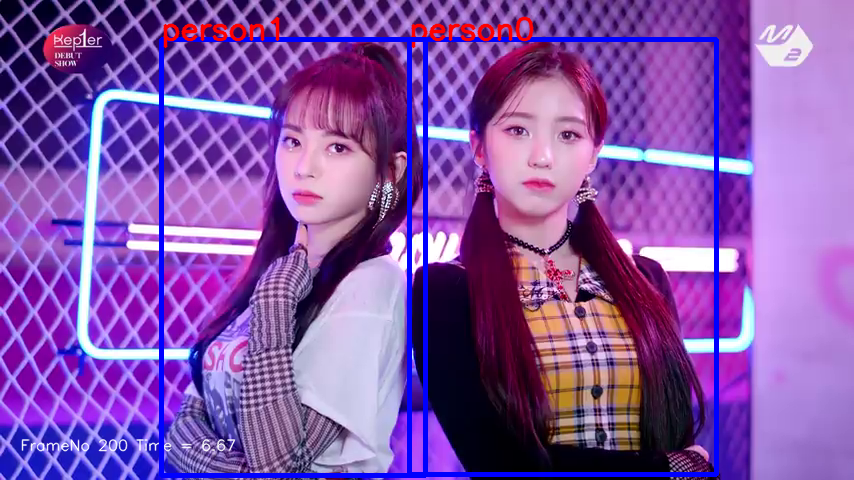

 43%|████▎     | 300/700 [01:32<02:21,  2.82it/s]

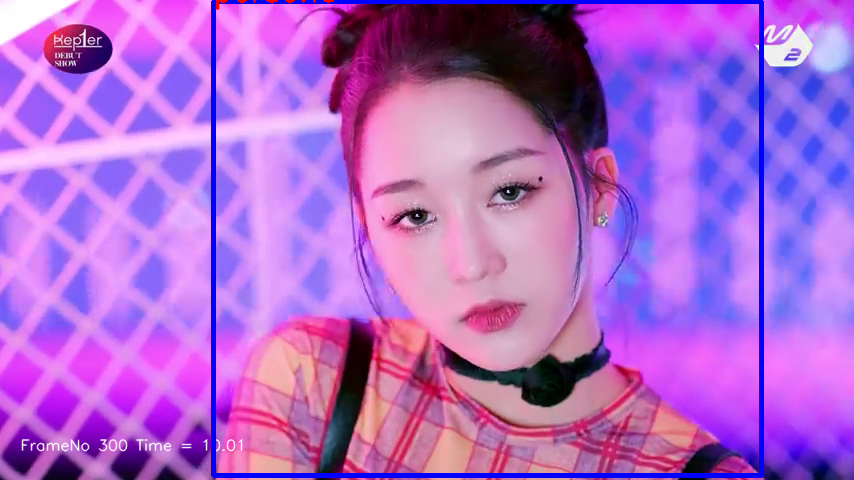

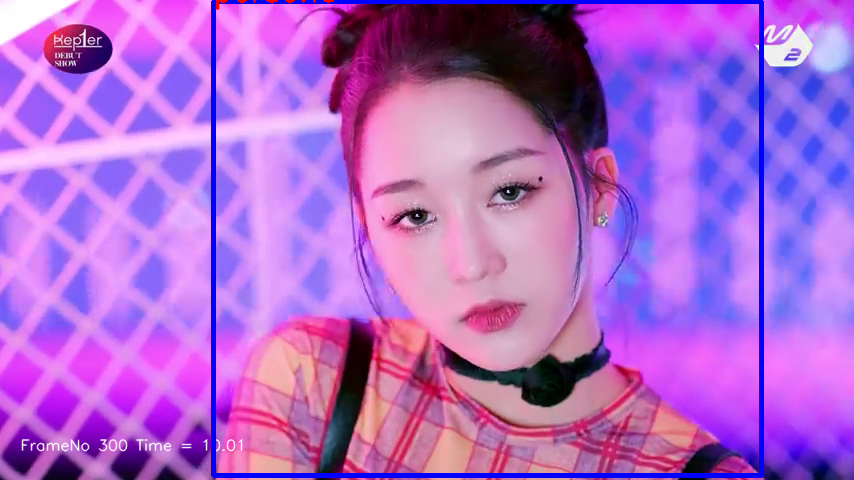

 57%|█████▋    | 400/700 [02:18<02:43,  1.84it/s]

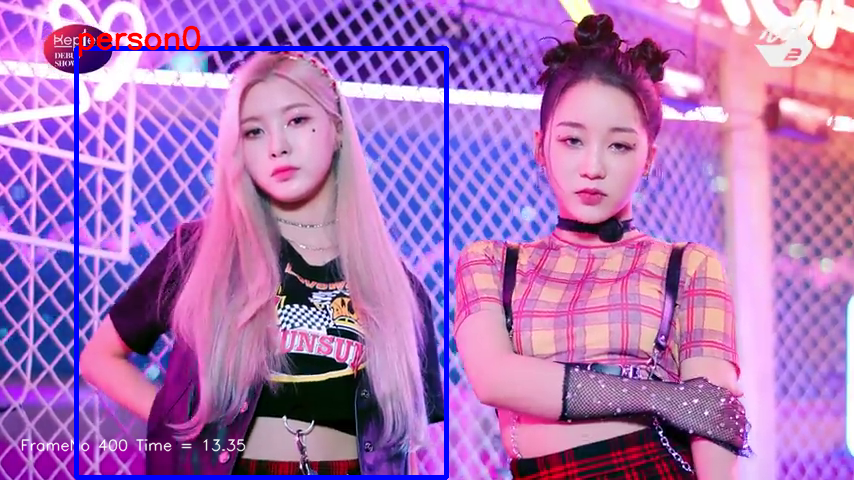

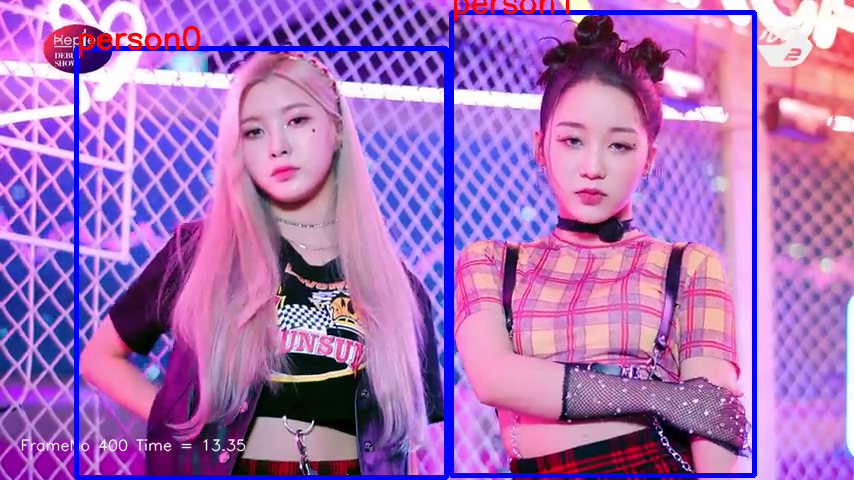

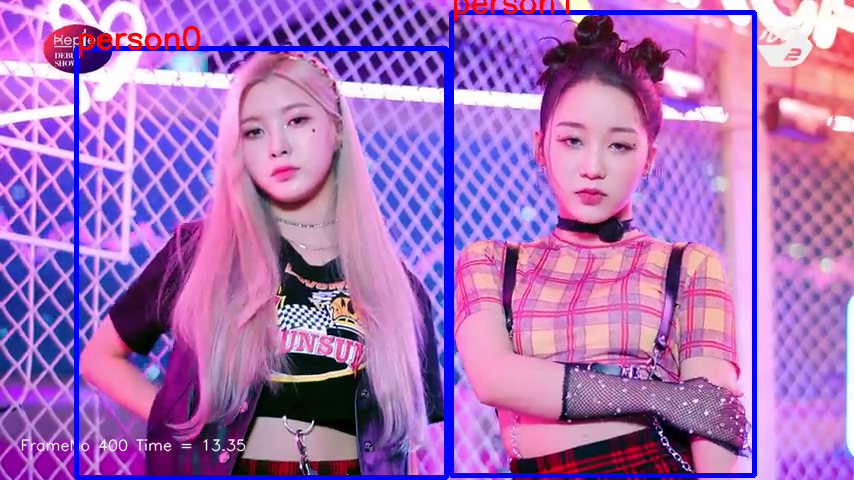

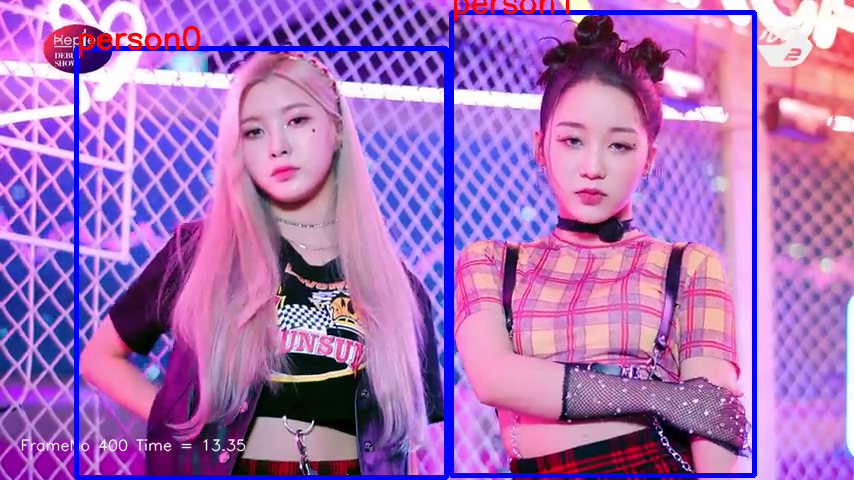

 71%|███████▏  | 500/700 [02:57<01:18,  2.56it/s]

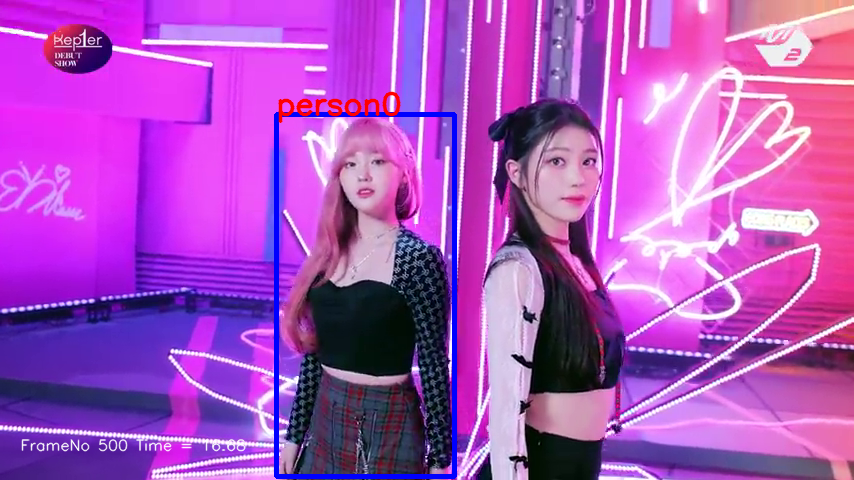

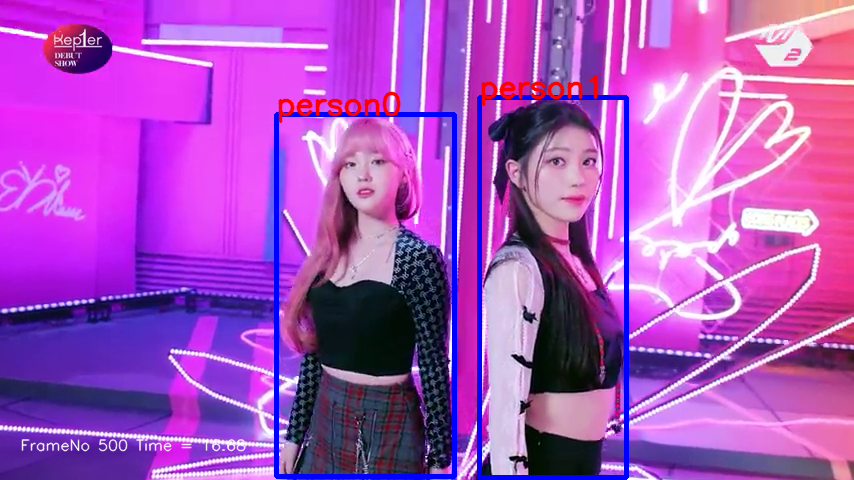

 86%|████████▌ | 600/700 [03:46<00:54,  1.82it/s]

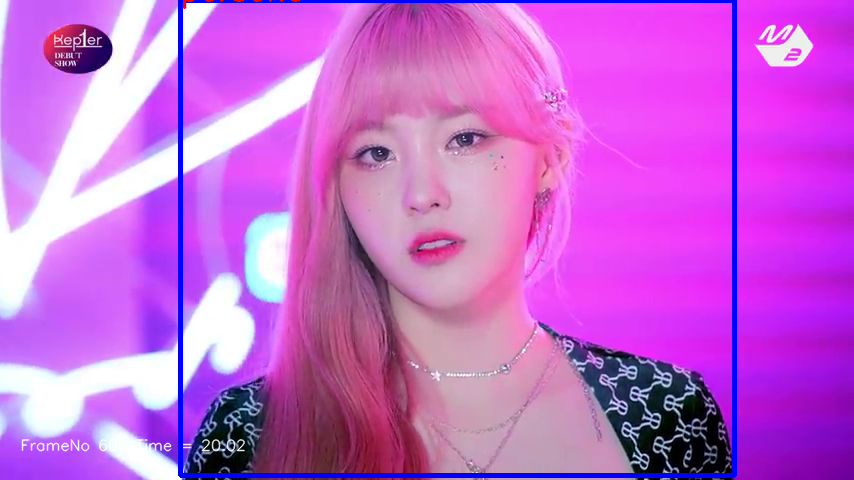

100%|██████████| 700/700 [04:26<00:00,  2.63it/s]


In [ ]:
savepath = ""
savepath = "/content/drive/MyDrive/152_478_AI_2564_2/video_data/"
savefile = 'yolo_output.mp4'

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out    = cv2.VideoWriter(savepath+savefile, fourcc, fps, (width,height))
    


cap = cv2.VideoCapture(Path+filename)


for i in tqdm(range(800,1500)):

    cap.set(cv2.CAP_PROP_POS_FRAMES, i)    

   # Get the next frame, but don't decode if we're not using it.
    success    = cap.grab()

    ret, image = cap.retrieve()

  

    if  ret :

      duration = (i-800)/fps
      text = f"FrameNo {i-800} Time = {duration:.2f}"

      start_point = (20,height-30)
      image = cv2.putText(image, text, start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA, False)
      


    
      results = model(image)
      Dictdata =  results.pandas().xyxy[0].to_dict('index')
      
      color     = (255, 0, 0)
      thickness = 3

      for key, x in Dictdata.items():
        if x['name'] == 'person' :
            start_point = ( int(x['xmin']), int(x['ymin']) )
            end_point   = ( int(x['xmax']), int(x['ymax']) )
            image = cv2.rectangle(image, start_point, end_point, color, thickness)
            text = x['name']+str(key)
            image = cv2.putText(image, text, start_point, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA, False)
            out.write(image)

        if i% 100 ==0  :
           cv2_imshow(image)
      


out.release()      
cap.release()
